# Water - CO$_2$ state #

Tests of the WaterCO2 FluidState UserObject

Chris Green, 2015 (chris.green@csiro.au)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Test 1 ##

In this test, a pressure gradient of -0.1 MPa/m is applied to the 1D mesh (from x = 0 to x = 100), so that the pressure at the left edge of the mesh is 2MPa, and the pressure at the right side of the mesh is 1MPa. Only one component is modelled. Temperature is 100C. Initial liquid saturation is 0.7.

Read in the MOOSE data.

In [25]:
moosedata1 = pd.read_csv('../../../../../tests/userobjects/FluidState/WaterCO2/gold/waterco2_nodalproperties_0001.csv', header = 0)

Read in data obtained from NIST webbook (http://webbook.nist.gov/chemistry/fluid/).

In [27]:
nist_data = pd.read_csv('gold/nist_water.csv', header=None, delimiter='\t')

Plots of the initial pressure, saturation, and component mass fractions.

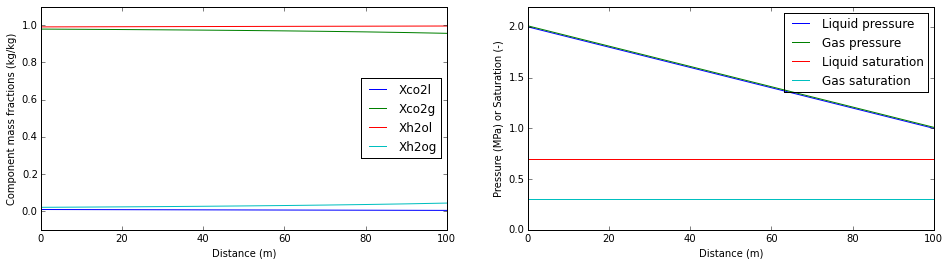

In [34]:
fig, axes = plt.subplots(1,2, figsize = (16,4))
# Plot of mass fraction component
axes[0].plot(moosedata1.x, moosedata1.xco2l, label = 'Xco2l')
axes[0].plot(moosedata1.x, moosedata1.xco2g, label = 'Xco2g')
axes[0].plot(moosedata1.x, moosedata1.xh2ol, label = 'Xh2ol')
axes[0].plot(moosedata1.x, moosedata1.xh2og, label = 'Xh2og')
axes[0].set_ylabel('Component mass fractions (kg/kg)')
axes[0].set_xlabel('Distance (m)')
axes[0].legend(loc = 'best')
axes[0].set_ylim([-0.1, 1.1])

# Plot of pressure and saturation
axes[1].plot(moosedata1.x, moosedata1.liquid_pressure/1e6, label = 'Liquid pressure')
axes[1].plot(moosedata1.x, moosedata1.gas_pressure/1e6, label = 'Gas pressure')
axes[1].plot(moosedata1.x, moosedata1.liquid_saturation, label = 'Liquid saturation')
axes[1].plot(moosedata1.x, moosedata1.gas_saturation, label = 'Gas saturation')
axes[1].set_ylabel('Pressure (MPa) or Saturation (-)')
axes[1].set_xlabel('Distance (m)')
axes[1].set_ylim([0,2.2])
axes[1].legend()

These plots verify that the initial pressure, saturation and mass fraction are set correctly.

Plots of the density and viscosity of the liquid (water) and gas (CO2) at these conditions. Also shown are data for these values taken from the NIST webbook (http://webbook.nist.gov/chemistry/fluid/).

In [11]:
nistdatawater = pd.read_csv('gold/nist_data_water.csv', delimiter='\t', header = None)
nistdataco2 = pd.read_csv('gold/nist_data_co2.csv', delimiter='\t', header = None)

xdata = np.linspace(0,100,11)

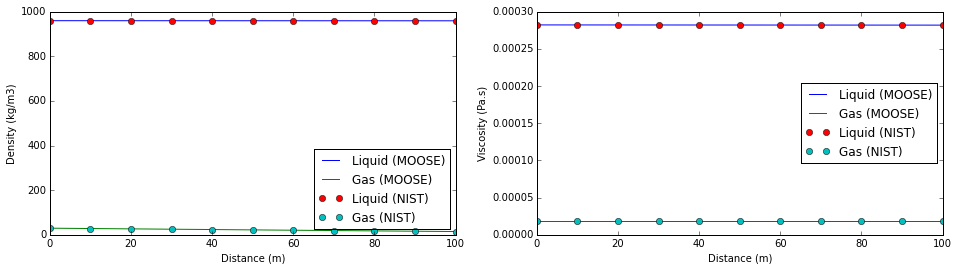

In [20]:
fig, axes = plt.subplots(1,2, figsize = (16,4))
# Plot of density
axes[0].plot(moosedata1.x, moosedata1.liquid_density, label = 'Liquid (MOOSE)')
axes[0].plot(moosedata1.x, moosedata1.gas_density, label = 'Gas (MOOSE)')
axes[0].plot(xdata, np.flipud(nistdatawater.icol(2)),'o', label='Liquid (NIST)')
axes[0].plot(xdata, np.flipud(nistdataco2.icol(2)),'o', label='Gas (NIST)')
axes[0].set_ylabel('Density (kg/m3)')
axes[0].set_xlabel('Distance (m)')
axes[0].legend(loc = 'best')
# Plot of viscosity
axes[1].plot(moosedata1.x, moosedata1.liquid_viscosity, label = 'Liquid (MOOSE)')
axes[1].plot(moosedata1.x, moosedata1.gas_viscosity, label = 'Gas (MOOSE)')
axes[1].plot(xdata, np.flipud(nistdatawater.icol(11)),'o', label='Liquid (NIST)')
axes[1].plot(xdata, np.flipud(nistdataco2.icol(11)),'o', label='Gas (NIST)')
axes[1].set_ylabel('Viscosity (Pa.s)')
axes[1].set_xlabel('Distance (m)')
axes[1].legend(loc = 'best')

The mobility $\lambda = k_r \rho / \mu$ given by the FluidState UserObject can also be compared to the results calculated using 
the given values for relative permeability, density and viscosity.

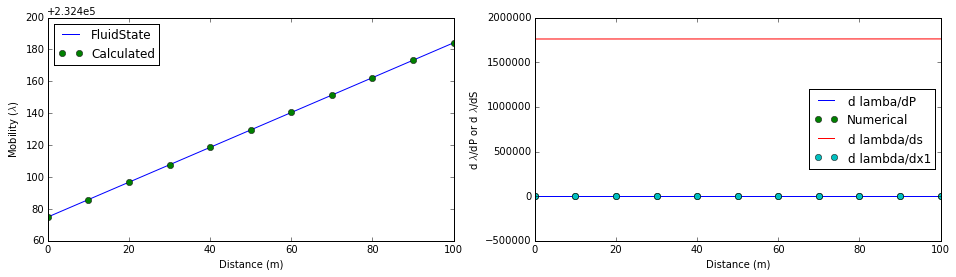

In [15]:
fig, axes = plt.subplots(1,2, figsize = (16,4))
# Plot of mobility
axes[0].plot(moosedata1.x, moosedata1.liquid_mobility, label = 'FluidState')
axes[0].plot(moosedata1.x, moosedata1.liquid_relperm * moosedata1.liquid_density/moosedata1.liquid_viscosity, 'o', label = 'Calculated')
axes[0].set_ylabel('Mobility ($\lambda$)')
axes[0].set_xlabel('Distance (m)')
axes[0].legend(loc = 'upper left')
# Plot of derivative of mobility wrt p and s
axes[1].plot(moosedata1.x, moosedata1.dliquidmobilitydp, label = 'd lamba/dP')
axes[1].plot(moosedata1.x, np.gradient(moosedata1.liquid_mobility, 10)/np.gradient(moosedata1.liquid_pressure, 10), 'o', label = 'Numerical')
axes[1].plot(moosedata1.x, moosedata1.dliquidmobilityds, label = 'd lambda/ds')
axes[1].plot(moosedata1.x, moosedata1.dliquidmobilitydx1, 'o',label = 'd lambda/dx1')
axes[1].set_ylabel('d $\lambda$/dP or d $\lambda$/dS')
axes[1].set_xlabel('Distance (m)')
axes[1].legend(loc = 'best')

Similarly for the gas phase

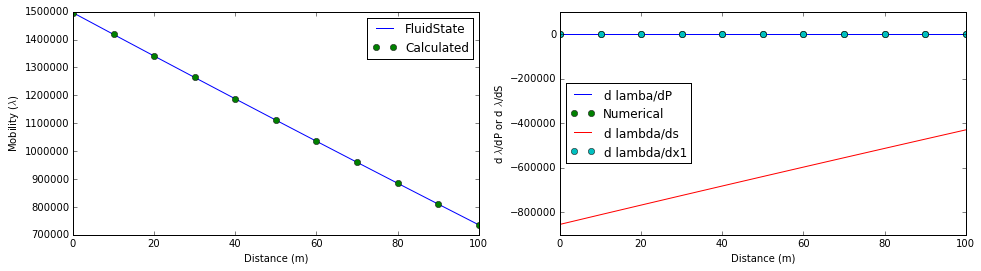

In [16]:
fig, axes = plt.subplots(1,2, figsize = (16,4))
# Plot of mobility
axes[0].plot(moosedata1.x, moosedata1.gasmobility, label = 'FluidState')
axes[0].plot(moosedata1.x, moosedata1.gas_relperm * moosedata1.gas_density/moosedata1.gas_viscosity, 'o', label = 'Calculated')
axes[0].set_ylabel('Mobility ($\lambda$)')
axes[0].set_xlabel('Distance (m)')
axes[0].legend(loc = 'upper right')
# Plot of derivative of mobility wrt p and s
axes[1].plot(moosedata1.x, moosedata1.dgasmobilitydp, label = 'd lamba/dP')
axes[1].plot(moosedata1.x, np.gradient(moosedata1.gasmobility, 10)/np.gradient(moosedata1.gas_pressure, 10), 'o', label = 'Numerical')
axes[1].plot(moosedata1.x, moosedata1.dgasmobilityds, label = 'd lambda/ds')
axes[1].plot(moosedata1.x, moosedata1.dgasmobilitydx1, 'o',label = 'd lambda/dx1')
axes[1].set_ylabel('d $\lambda$/dP or d $\lambda$/dS')
axes[1].set_xlabel('Distance (m)')
axes[1].legend(loc = 'best')

Plots of the Relative permeabiltiy and its derivative wrt saturation.

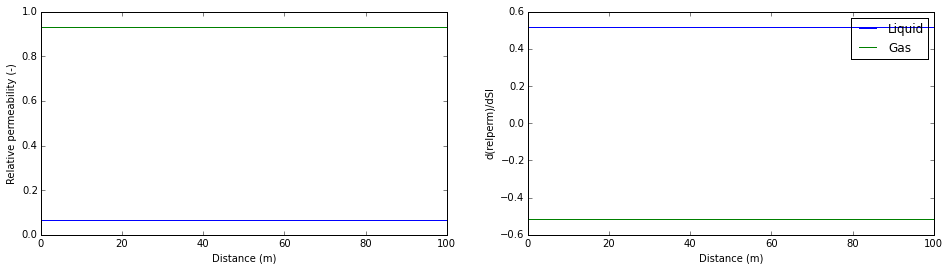

In [17]:
fig, axes = plt.subplots(1,2, figsize = (16,4))
# Plot of relative permeability
axes[0].plot(moosedata1.x, moosedata1.liquid_relperm, label = 'Liquid')
axes[0].plot(moosedata1.x, moosedata1.gas_relperm, label = 'Gas')


axes[0].set_ylabel('Relative permeability (-)')
axes[0].set_xlabel('Distance (m)')
# Plot of derivative of relative permeability
axes[1].plot(moosedata1.x, moosedata1.dliquidrelperm, label = 'Liquid')
axes[1].plot(moosedata1.x, moosedata1.dgasrelperm, label = 'Gas')
axes[1].set_ylabel('d(relperm)/dSl')
axes[1].set_xlabel('Distance (m)')
axes[1].legend()

## Henry's law coefficient ##

Calculate the Henry's law coefficient for CO$_2$ in water using the correlation from *Guideline on the Henry's constant and vapour-liquid distribution constant for gases in H2O and D2O at high temperatures*, IAPWS (2004). Data points are verification points provided in the above guideline.


In [8]:
moosedata = pd.read_csv('gold/FluidStateWaterCO2_henry_vpp_0001.csv')

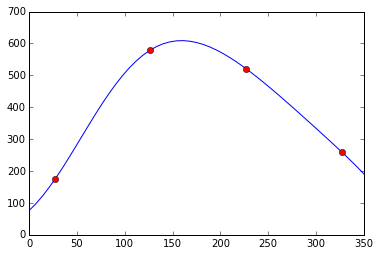

In [9]:
plt.plot(175*moosedata.x, moosedata.FluidStateAuxVariable*1e-6)
plt.plot(300-273.15, 1.e3*np.exp(-1.7508),'or')
plt.plot(400-273.15, 1.e3*np.exp(-0.545),'or')
plt.plot(500-273.15, 1.e3*np.exp(-0.6524),'or')
plt.plot(600-273.15, 1.e3*np.exp(-1.3489),'or')